In [41]:
import pandas as pd

data = pd.read_csv('ChiTrafCrash', low_memory=False)
people = pd.read_csv('ChiPeopCrash', low_memory=False)

#merge two datasets on the column CRASH_RECORD_ID
all_df = pd.merge(data, people, on='CRASH_RECORD_ID')
all_df.head()

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER BACKING,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [42]:
#drop irrelevant columns
drop_cols = ['CRASH_RECORD_ID','RD_NO_x', 'CRASH_DATE_EST_I', 'BEAT_OF_OCCURRENCE', 'DATE_POLICE_NOTIFIED', 
             'REPORT_TYPE', 'DAMAGE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'MOST_SEVERE_INJURY', 
             'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 
             'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'ALIGNMENT', 
             'DEVICE_CONDITION', 'STREET_NO', 'STREET_DIRECTION', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 
             'LANE_CNT', 'PERSON_ID', 'VEHICLE_ID', 'CRASH_DATE_y', 'CITY', 'STATE', 'ZIPCODE', 'LATITUDE', 
             'LONGITUDE', 'RD_NO_y', 'DRIVERS_LICENSE_STATE', 'AIRBAG_DEPLOYED', 'EJECTION', 'HOSPITAL', 
             'EMS_AGENCY', 'EMS_RUN_NO', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 
             'BAC_RESULT VALUE', 'CELL_PHONE_USE', 'CRASH_DATE_x', 'DOORING_I', 'NOT_RIGHT_OF_WAY_I', 
             'HIT_AND_RUN_I', 'SEC_CONTRIBUTORY_CAUSE', 'WORK_ZONE_I', 'SEAT_NO', 'FIRST_CRASH_TYPE', 
             'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'NUM_UNITS', 'LOCATION', 'BAC_RESULT', 'DRIVER_ACTION', 
             'DRIVER_VISION', 'DRIVERS_LICENSE_CLASS']

all_df.drop(drop_cols, axis=1, inplace=True)

#drop rows where the accident is not from a car driver
all_df.drop(all_df.loc[all_df['PERSON_TYPE'] != 'DRIVER'].index, inplace=True)
#drop column PERSON_TYPE as only needed to determine all records were from car drivers
all_df.drop('PERSON_TYPE', axis=1, inplace=True)

In [43]:
#FUNCTIONS TO CHANGE INDIVIDUAL COLUMNS
def speed_limit(rate):
    speed = float(rate)
    if speed < 10:
        return '-10'
    elif speed < 15:
        return '10'
    elif speed < 20:
        return '15'
    elif speed < 25:
        return '20'
    elif speed < 30:
        return '25'
    elif speed < 35:
        return '30'
    elif speed < 40:
        return '35'
    elif speed < 45:
        return '40'
    elif speed < 50:
        return '45'
    else:
        return '+45'
    
    
def traffic_device(device):
    keep = ['NO CONTROLS', 'TRAFFIC SIGNAL', 'STOP SIGN/FLASHER', 'UNKNOWN', 'OTHER']
    if device in keep:
        return device
    else:
        return 'OTHER'

    
def weather(condition):
    keep = ['CLEAR', 'RAIN', 'SNOW', 'UNKNOWN', 'OTHER']
    if condition in keep:
        return condition
    else:
        return 'OTHER'


def defects(defect):
    keep = ['NO DEFECTS', 'UNKNOWN', 'OTHER']
    if defect in keep:
        return defect
    else:
        return 'OTHER'

    
def time(hour):
    peak = [6,7,8,9,10,14,15,16,17,18,19]
    if hour in peak:
        return 'RUSH HRS'
    else:
        return 'NON RUSH HRS'

    
def age_range(age):
    if age <= 15:
        return 'TOO YOUNG'
    if age < 20:
        return 'TEENAGER'
    elif age < 30:
        return 'TWENTIES'
    elif age < 40:
        return 'THIRTIES'
    elif age < 50:
        return 'FORTIES'
    elif age < 60:
        return 'FIFTIES'
    elif age < 70:
        return 'SIXTIES'
    elif age < 80:
        return 'SEVENTIES'
    else:
        return 'EIGHTY OR OLDER'

    
def safety(equipment):
    keep = ['USAGE UNKNOWN', 'NONE PRESENT']
    used = ['SAFETY BELT USED', 'CHILD RESTRAINT USED', 'CHILD RESTRAINT - FORWARD FACING', 
            'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)', 'HELMET USED', 'DOT COMPLIANT MOTORCYCLE HELMET', 
            'CHILD RESTRAINT - TYPE UNKNOWN', 'CHILD RESTRAINT - REAR FACING', 'BOOSTER SEAT']
    if equipment in keep:
        return equipment
    elif equipment in used:
        return 'SAFETY USED'
    elif 'IMPROPERLY' in equipment:
        return 'USED IMPROPERLY'
    elif 'NOT USED' in equipment:
        return 'NOT USED'
    elif 'NOT DOT' in equipment:
        return 'USED IMPROPERLY'
    else:
        return 'OTHER' 

    
def road_surface(condition):
    keep = ['WET', 'DRY', 'OTHER', 'UNKNOWN']
    wet = ['SNOW OR SLUSH', 'ICE']
    if condition in keep:
        return condition
    elif condition in wet:
        return 'WET'
    else:
        return 'OTHER'

    
names = list(all_df.STREET_NAME.value_counts().sort_values()[1518:].index)
def street_acc(name):
    if name in names:
        return 'HIGH ACCIDENT RATE'
    else:
        return 'LOW ACCIDENT RATE'


def phys_cond(condition):
    keep = ['NORMAL', 'UNKNOWN', 'OTHER']
    substance = ['HAD BEEN DRINKING', 'MEDICATED']
    physical = ['FATIGUED/ASLEEP', 'EMOTIONAL', 'ILLNESS/FAINTED']
    if condition in keep:
        return condition
    elif 'IMPAIRED' in condition:
        return 'IMPAIRED'
    elif condition in substance:
        return 'IMPAIRED'
    elif condition in physical:
        return 'FATIGUE/ILL/EMOTION'
    else:
        return 'OTHER'

def primary(cause):
    keep = ['UNABLE TO DETERMINE', 'NOT APPLICABLE', 'WEATHER']
    construction = ['ROAD CONSTRUCTION/MAINTENANCE', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS']
    not_driver = ['VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 
                  'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST', 'ANIMAL', 'OBSTRUCTED CROSSWALKS']
    if cause in keep:
        return cause
    elif cause in construction:
        return 'CONSTRUCTION'
    elif cause in not_driver:
        return 'NOT DRIVER FAULT'
    else:
        return 'DRIVER FAULT'

In [44]:
#apply functions to appropriate columns
all_df.POSTED_SPEED_LIMIT = all_df.POSTED_SPEED_LIMIT.apply(speed_limit)
all_df.TRAFFIC_CONTROL_DEVICE = all_df.TRAFFIC_CONTROL_DEVICE.apply(traffic_device)
all_df.WEATHER_CONDITION = all_df.WEATHER_CONDITION.apply(weather)
all_df.ROAD_DEFECT = all_df.ROAD_DEFECT.apply(defects)
all_df.CRASH_HOUR = all_df.CRASH_HOUR.apply(time)
all_df.AGE = all_df.AGE.apply(age_range)
all_df.SAFETY_EQUIPMENT = all_df.SAFETY_EQUIPMENT.apply(safety)
all_df.ROADWAY_SURFACE_COND = all_df.ROADWAY_SURFACE_COND.apply(road_surface)
all_df.PHYSICAL_CONDITION = all_df.PHYSICAL_CONDITION.apply(phys_cond)
all_df.PRIM_CONTRIBUTORY_CAUSE = all_df.PRIM_CONTRIBUTORY_CAUSE.apply(primary)


names = list(all_df.STREET_NAME.value_counts().sort_values()[1518:].index)
all_df.STREET_NAME = all_df.STREET_NAME.apply(street_acc)

In [45]:
#drop rows with NaN in the INTERSECTION_RELATED_I column
all_df = all_df[all_df.INTERSECTION_RELATED_I.notna()]
all_df.shape

(233916, 17)

In [46]:
#Convert all cell values with entry 'UNKNOWN' to NaN
import numpy as np
all_df = all_df.replace('UNKNOWN', np.nan)

#Drop rows with NaN values
all_df = all_df.dropna()
all_df.shape

(161886, 17)

In [47]:
#change INJURY_CLASSIFICATION column values to indicate whether accident yielded an injury or not
all_df.INJURY_CLASSIFICATION = np.where((all_df.INJURY_CLASSIFICATION == 'NO INDICATION OF INJURY'), 'NO INJURY', 'INJURY')
#rename STREET_NAME column to ACCIDENT_RATE as column now indicates whether street has a high or low accident rate
all_df.rename(columns={'STREET_NAME':'ACCIDENT_RATE'}, inplace=True)

In [48]:
#ensure all values of dataframe are strings for One Hot Encoder
all_df = all_df.astype('str')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#split data into features and target
X = all_df.drop('INJURY_CLASSIFICATION', axis=1)
y = all_df.INJURY_CLASSIFICATION

#train test split X (the features of the dataset) using random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#One Hot Encode X on both training (fit and transform) and testing data (transofrm only)
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train).toarray()
X_test_ohe = ohe.transform(X_test)


In [49]:
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))
ohe_df

,POSTED_SPEED_LIMIT_+45,POSTED_SPEED_LIMIT_-10,POSTED_SPEED_LIMIT_10,POSTED_SPEED_LIMIT_15,POSTED_SPEED_LIMIT_20,POSTED_SPEED_LIMIT_25,POSTED_SPEED_LIMIT_30,POSTED_SPEED_LIMIT_35,POSTED_SPEED_LIMIT_40,POSTED_SPEED_LIMIT_45,...,AGE_TWENTIES,SAFETY_EQUIPMENT_NONE PRESENT,SAFETY_EQUIPMENT_NOT USED,SAFETY_EQUIPMENT_SAFETY USED,SAFETY_EQUIPMENT_USAGE UNKNOWN,SAFETY_EQUIPMENT_USED IMPROPERLY,PHYSICAL_CONDITION_FATIGUE/ILL/EMOTION,PHYSICAL_CONDITION_IMPAIRED,PHYSICAL_CONDITION_NORMAL,PHYSICAL_CONDITION_OTHER
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121409,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
121410,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
121411,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
121412,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 

all_df.INJURY_CLASSIFICATION.value_counts()

NO INJURY    142934
INJURY        18952
Name: INJURY_CLASSIFICATION, dtype: int64

In [51]:
all_df.WEATHER_CONDITION.value_counts()

CLEAR    131610
RAIN      16763
OTHER      7658
SNOW       5855
Name: WEATHER_CONDITION, dtype: int64

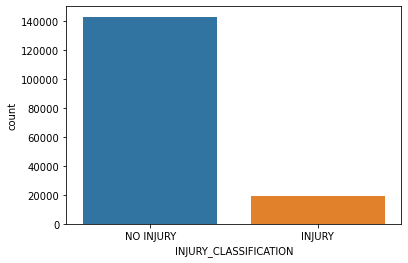

In [52]:
sns.countplot(x='INJURY_CLASSIFICATION', data=all_df)
plt.show()

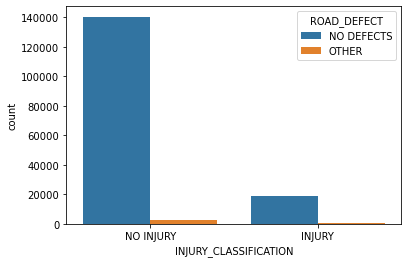

In [100]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='ROAD_DEFECT', data=all_df);

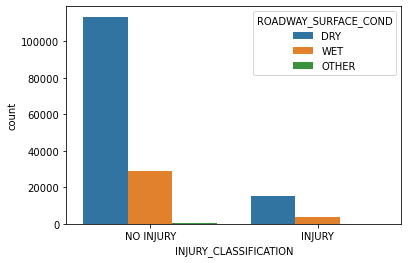

In [99]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='ROADWAY_SURFACE_COND', data=all_df);

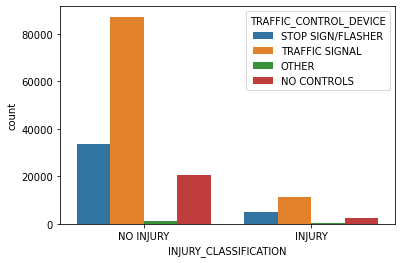

In [97]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='TRAFFIC_CONTROL_DEVICE', data=all_df);

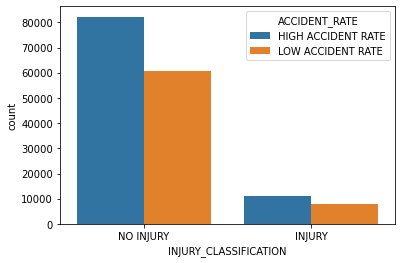

In [98]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='ACCIDENT_RATE', data=all_df);

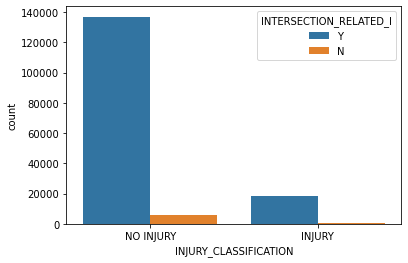

In [102]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='INTERSECTION_RELATED_I', data=all_df);

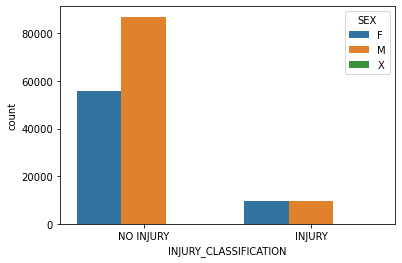

In [103]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='SEX', data=all_df);

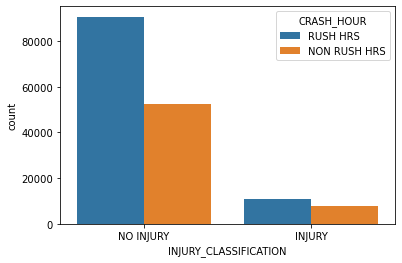

In [104]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='CRASH_HOUR', data=all_df);

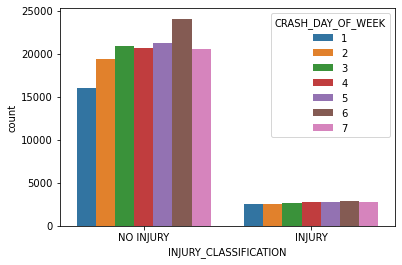

In [105]:
#SUNDAY=1
sns.countplot(x='INJURY_CLASSIFICATION', hue='CRASH_DAY_OF_WEEK', data=all_df);

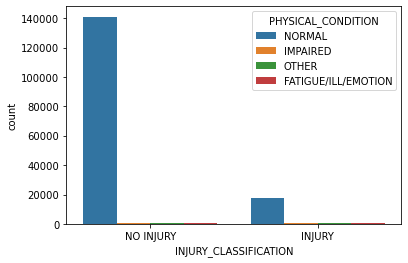

In [106]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='PHYSICAL_CONDITION', data=all_df);

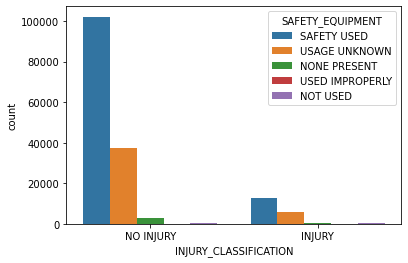

In [107]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='SAFETY_EQUIPMENT', data=all_df);

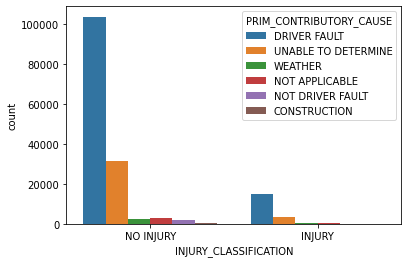

In [111]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='PRIM_CONTRIBUTORY_CAUSE', data=all_df);

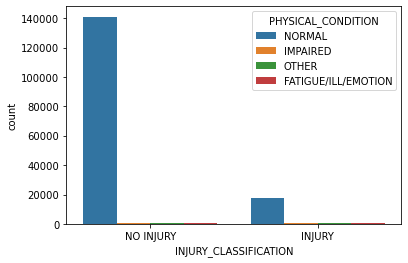

In [114]:
sns.countplot(x='INJURY_CLASSIFICATION', hue='PHYSICAL_CONDITION', data=all_df);

In [78]:
all_df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,PRIM_CONTRIBUTORY_CAUSE,ACCIDENT_RATE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,SEX,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,PHYSICAL_CONDITION
4,35,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,DRIVER FAULT,HIGH ACCIDENT RATE,RUSH HRS,6,6,F,TWENTIES,SAFETY USED,NO INJURY,NORMAL
13,30,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,HIGH ACCIDENT RATE,NON RUSH HRS,5,3,M,FORTIES,USAGE UNKNOWN,NO INJURY,NORMAL
14,30,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,HIGH ACCIDENT RATE,NON RUSH HRS,5,3,F,TEENAGER,USAGE UNKNOWN,NO INJURY,NORMAL
23,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,LOW ACCIDENT RATE,RUSH HRS,3,6,F,FIFTIES,USAGE UNKNOWN,NO INJURY,NORMAL
24,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,LOW ACCIDENT RATE,RUSH HRS,3,6,M,FIFTIES,SAFETY USED,NO INJURY,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168831,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,HIGH ACCIDENT RATE,NON RUSH HRS,4,7,M,EIGHTY OR OLDER,USAGE UNKNOWN,NO INJURY,NORMAL
1168832,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,HIGH ACCIDENT RATE,NON RUSH HRS,4,7,M,TWENTIES,USAGE UNKNOWN,INJURY,NORMAL
1168844,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,DRIVER FAULT,LOW ACCIDENT RATE,RUSH HRS,3,7,M,THIRTIES,USAGE UNKNOWN,NO INJURY,NORMAL
1168845,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,DRIVER FAULT,LOW ACCIDENT RATE,RUSH HRS,3,7,M,FORTIES,USAGE UNKNOWN,NO INJURY,NORMAL


In [80]:
len(all_df.columns)

17

In [82]:
all_df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,PRIM_CONTRIBUTORY_CAUSE,ACCIDENT_RATE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,SEX,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,PHYSICAL_CONDITION
4,35,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,DRIVER FAULT,HIGH ACCIDENT RATE,RUSH HRS,6,6,F,TWENTIES,SAFETY USED,NO INJURY,NORMAL
13,30,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,HIGH ACCIDENT RATE,NON RUSH HRS,5,3,M,FORTIES,USAGE UNKNOWN,NO INJURY,NORMAL
14,30,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,HIGH ACCIDENT RATE,NON RUSH HRS,5,3,F,TEENAGER,USAGE UNKNOWN,NO INJURY,NORMAL
23,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,LOW ACCIDENT RATE,RUSH HRS,3,6,F,FIFTIES,USAGE UNKNOWN,NO INJURY,NORMAL
24,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,LOW ACCIDENT RATE,RUSH HRS,3,6,M,FIFTIES,SAFETY USED,NO INJURY,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168831,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,HIGH ACCIDENT RATE,NON RUSH HRS,4,7,M,EIGHTY OR OLDER,USAGE UNKNOWN,NO INJURY,NORMAL
1168832,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,Y,UNABLE TO DETERMINE,HIGH ACCIDENT RATE,NON RUSH HRS,4,7,M,TWENTIES,USAGE UNKNOWN,INJURY,NORMAL
1168844,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,DRIVER FAULT,LOW ACCIDENT RATE,RUSH HRS,3,7,M,THIRTIES,USAGE UNKNOWN,NO INJURY,NORMAL
1168845,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,DRIVER FAULT,LOW ACCIDENT RATE,RUSH HRS,3,7,M,FORTIES,USAGE UNKNOWN,NO INJURY,NORMAL


In [85]:
all_df.describe()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,PRIM_CONTRIBUTORY_CAUSE,ACCIDENT_RATE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,SEX,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,PHYSICAL_CONDITION
count,161886,161886,161886,161886,161886,161886,161886,161886,161886,161886,161886,161886,161886,161886,161886,161886,161886
unique,10,4,4,5,3,2,2,6,2,2,7,12,3,9,5,2,4
top,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,Y,DRIVER FAULT,HIGH ACCIDENT RATE,RUSH HRS,6,7,M,TWENTIES,SAFETY USED,NO INJURY,NORMAL
freq,134479,98646,131610,110513,128590,158916,155253,118643,93238,101606,27006,15059,96417,42142,114692,142934,158398


In [84]:
pd.plotting.scatter_matrix(all_df.describe());

ValueError: Number of columns must be > 0, not 0

<Figure size 432x288 with 0 Axes>

In [76]:
#check collinearity of features
#df to look for collinearity in predictors via correlation matrix pairing
features = all_df.drop('INJURY_CLASSIFICATION', axis=1)
data_pred = features.copy()
data_pred.corr()
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new 
#column named "pairs"
##df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
##df.set_index(['pairs'], inplace = True)
#drop level columns
##df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
##df.columns = ['cc']
# drop duplicates
##df.drop_duplicates(inplace=True)
#list the pairs with a high correlation, indicating collinearity
##df[(df.cc > 0.75) & (df.cc < 1)]

IndexError: list index out of range

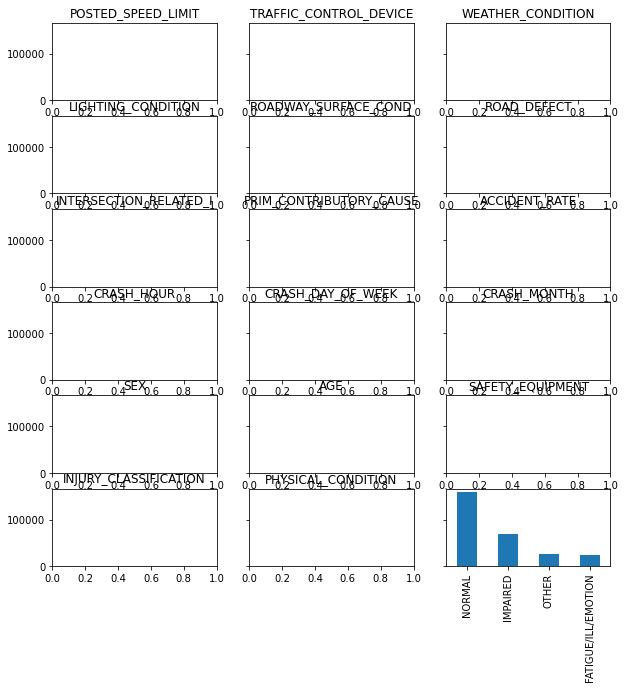

In [70]:
#create bar plots for features
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10,10), sharey=True)
columns = list(all_df.columns)

for col, ax in zip(columns, axes.flatten()):
    all_df[col].value_counts().plot(kind='bar')
    ax.set_title(col)

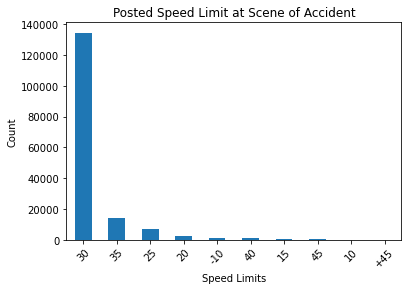

In [92]:
all_df['POSTED_SPEED_LIMIT'].value_counts().plot(kind='bar', xlabel='Speed Limits', ylabel='Count', 
                                                     title='Posted Speed Limit at Scene of Accident', 
                                                     rot=45);


In [57]:
columns

['POSTED_SPEED_LIMIT',
 'TRAFFIC_CONTROL_DEVICE',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'INTERSECTION_RELATED_I',
 'PRIM_CONTRIBUTORY_CAUSE',
 'ACCIDENT_RATE',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'SEX',
 'AGE',
 'SAFETY_EQUIPMENT',
 'INJURY_CLASSIFICATION',
 'PHYSICAL_CONDITION']

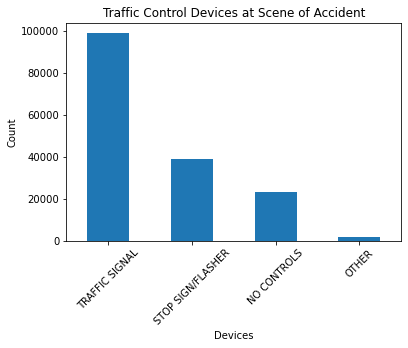

In [89]:
all_df['TRAFFIC_CONTROL_DEVICE'].value_counts().plot(kind='bar', xlabel='Devices', ylabel='Count', 
                                                     title='Traffic Control Devices at Scene of Accident', 
                                                     rot=45);

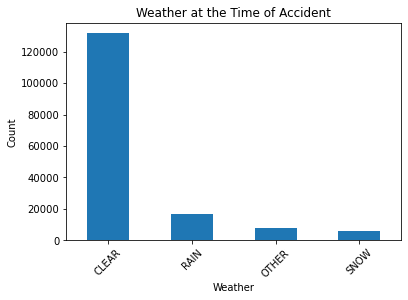

In [90]:
all_df['WEATHER_CONDITION'].value_counts().plot(kind='bar', xlabel='Weather', ylabel='Count', 
                                                     title='Weather at the Time of Accident', 
                                                     rot=45);

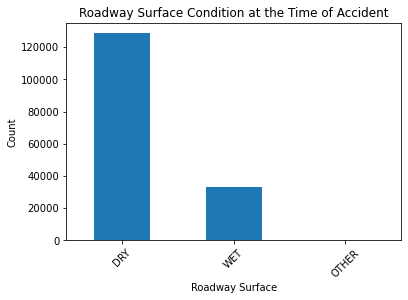

In [93]:
all_df['ROADWAY_SURFACE_COND'].value_counts().plot(kind='bar', xlabel='Roadway Surface', ylabel='Count', 
                                                     title='Roadway Surface Condition at the Time of Accident', 
                                                     rot=45);

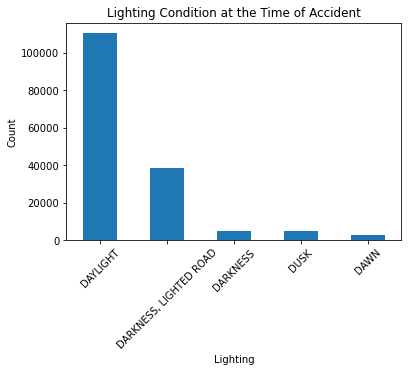

In [94]:
all_df['LIGHTING_CONDITION'].value_counts().plot(kind='bar', xlabel='Lighting', ylabel='Count', 
                                                     title='Lighting Condition at the Time of Accident', 
                                                     rot=45);

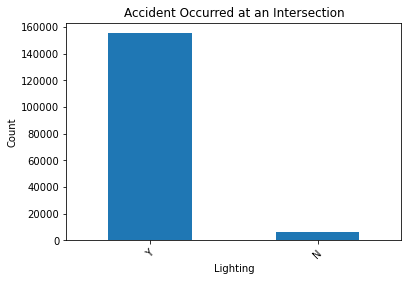

In [109]:
all_df['INTERSECTION_RELATED_I'].value_counts().plot(kind='bar', xlabel='Lighting', ylabel='Count', 
                                                     title='Accident Occurred at an Intersection', 
                                                     rot=45);

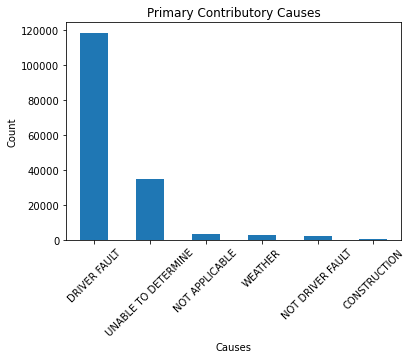

In [110]:
all_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().plot(kind='bar', xlabel='Causes', ylabel='Count', 
                                                     title='Primary Contributory Causes', 
                                                     rot=45);

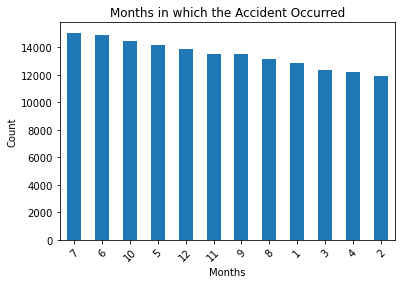

In [112]:
all_df['CRASH_MONTH'].value_counts().plot(kind='bar', xlabel='Months', ylabel='Count', 
                                                     title='Months in which the Accident Occurred', 
                                                     rot=45);

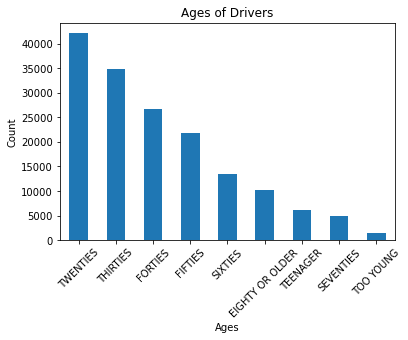

In [113]:
all_df['AGE'].value_counts().plot(kind='bar', xlabel='Ages', ylabel='Count', 
                                                     title='Ages of Drivers', 
                                                     rot=45);

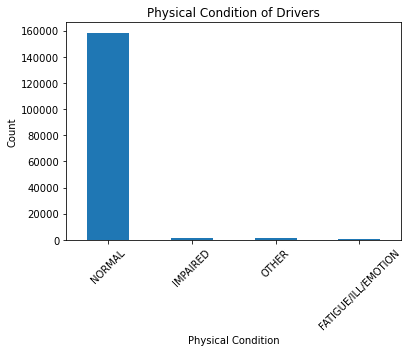

In [115]:
all_df['PHYSICAL_CONDITION'].value_counts().plot(kind='bar', xlabel='Physical Condition', ylabel='Count', 
                                                     title='Physical Condition of Drivers', 
                                                     rot=45);